In [1]:
!pip install -U jupyter

In [2]:
!pip install ydata_profiling

In [3]:

pip install --upgrade bottleneck

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings ('ignore')
from scipy import stats
from scipy.stats import skew

#

# Data 1

In [2]:
data = pd.read_csv ('dataset_1.csv')
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18
606,607,28-01-2011,1,0,1,12,False,5,3,0.18
607,608,28-01-2011,1,0,1,13,False,5,3,0.18
608,609,28-01-2011,1,0,1,14,False,5,3,0.22


### Unique value

In [5]:
unique_values = set(data)
print(unique_values)

{'mnth', 'weathersit', 'dteday', 'season', 'hr', 'yr', 'weekday', 'holiday', 'temp', 'instant'}


In [6]:
data['season'].unique()

array([1], dtype=int64)

In [7]:
data.head (5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24


In [8]:
data.tail (5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
605,606,28-01-2011,1,0,1,11,False,5,3,0.18
606,607,28-01-2011,1,0,1,12,False,5,3,0.18
607,608,28-01-2011,1,0,1,13,False,5,3,0.18
608,609,28-01-2011,1,0,1,14,False,5,3,0.22
609,610,28-01-2011,1,0,1,15,False,5,2,0.20


In [9]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     610 non-null    int64  
 1   dteday      610 non-null    object 
 2   season      610 non-null    int64  
 3   yr          610 non-null    int64  
 4   mnth        610 non-null    int64  
 5   hr          610 non-null    int64  
 6   holiday     610 non-null    bool   
 7   weekday     610 non-null    int64  
 8   weathersit  610 non-null    int64  
 9   temp        610 non-null    float64
dtypes: bool(1), float64(1), int64(7), object(1)
memory usage: 43.6+ KB


In [4]:
data.describe ()

,instant,season,yr,mnth,hr,weekday,weathersit,temp
count,610.000000,610.0,610.0,610.0,610.000000,610.000000,610.000000,610.000000
mean,305.500000,1.0,0.0,1.0,11.795082,2.977049,1.477049,0.196885
std,176.236111,0.0,0.0,0.0,6.852107,2.054943,0.643496,0.081304
min,1.000000,1.0,0.0,1.0,0.000000,0.000000,1.000000,0.020000
25%,153.250000,1.0,0.0,1.0,6.000000,1.000000,1.000000,0.160000
50%,305.500000,1.0,0.0,1.0,12.000000,3.000000,1.000000,0.200000
75%,457.750000,1.0,0.0,1.0,18.000000,5.000000,2.000000,0.235000
max,610.000000,1.0,0.0,1.0,23.000000,6.000000,4.000000,0.460000


In [10]:
data.shape

(610, 10)

In [3]:
data.dropna (inplace= True)

In [12]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday          bool
weekday         int64
weathersit      int64
temp          float64
dtype: object

In [13]:
data.drop('yr', axis=1, inplace=True)
data.drop('mnth', axis=1, inplace=True)
data

,instant,dteday,season,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,False,6,1,0.24
1,2,01-01-2011,1,1,False,6,1,0.22
2,3,01-01-2011,1,2,False,6,1,0.22
3,4,01-01-2011,1,3,False,6,1,0.24
4,5,01-01-2011,1,4,False,6,1,0.24
...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,11,False,5,3,0.18
606,607,28-01-2011,1,12,False,5,3,0.18
607,608,28-01-2011,1,13,False,5,3,0.18
608,609,28-01-2011,1,14,False,5,3,0.22


In [14]:
print(data.duplicated().sum())

0


In [15]:
print(data.isnull().sum())

instant       0
dteday        0
season        0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
dtype: int64


In [16]:
#season_totals = data.groupby('season')['cnt'].sum()

#print(season_totals)

### Data 1 Profiling 

In [ ]:
# data profiling in html
data = pd.read_csv ('dataset_1.csv')
profile = ProfileReport(data)
profile.to_file(output_file = "data.html")

In [ ]:
# data profiling in html
data = pd.read_csv ('dataset_1.csv')
profile = ProfileReport(data)
profile.to_notebook_iframe()

#

# Data 2

In [5]:
data_2 = pd.read_csv ('dataset_2.csv')
data_2

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0000,3,13,16
1,1,2,0.2727,0.80,0.0000,8,32,40
2,2,3,0.2727,0.80,0.0000,5,27,32
3,3,4,0.2879,0.75,0.0000,3,10,13
4,4,5,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...
605,605,606,0.2121,0.93,0.1045,0,30,30
606,606,607,0.2121,0.93,0.1045,1,28,29
607,607,608,0.2121,0.93,0.1045,0,31,31
608,608,609,0.2727,0.80,0.0000,2,36,38


### Unique values

In [18]:
unique_values2 = set(data_2)
print(unique_values2)

{'atemp', 'windspeed', 'casual', 'cnt', 'registered', 'Unnamed: 0', 'hum', 'instant'}


In [19]:
data_2.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data_2.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  610 non-null    int64  
 1   instant     610 non-null    int64  
 2   atemp       599 non-null    float64
 3   hum         610 non-null    float64
 4   windspeed   610 non-null    float64
 5   casual      610 non-null    int64  
 6   registered  610 non-null    int64  
 7   cnt         610 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 38.2 KB


In [7]:
data_2.describe ()

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
count,610.000000,610.000000,599.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,304.500000,305.500000,0.199935,0.562475,0.204851,4.501639,51.068852,55.570492
std,176.236111,176.236111,0.078836,0.175440,0.121806,6.319945,47.021204,49.316802
min,0.000000,1.000000,0.000000,0.210000,0.000000,0.000000,0.000000,1.000000
25%,152.250000,153.250000,0.151500,0.432500,0.104500,0.000000,14.000000,16.000000
50%,304.500000,305.500000,0.197000,0.520000,0.194000,2.000000,43.000000,47.000000
75%,456.750000,457.750000,0.242400,0.690000,0.283600,6.000000,70.000000,79.750000
max,609.000000,610.000000,0.454500,1.000000,0.582100,47.000000,247.000000,249.000000


### Data 2 Profiling 

In [ ]:
# data profiling in html
data_2 = pd.read_csv ('dataset_2.csv')
profile = ProfileReport(data)
profile.to_file(output_file = "data_2.html")

#

# Merged Data 1 and Data 2

In [9]:
merged_data = pd.merge(data, data_2, on='instant', how='outer')  # 'how' parameter determines the type of merge

merged_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,Unnamed: 0,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,False,6,1,0.24,0,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,False,6,1,0.22,1,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,False,6,1,0.22,2,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,False,6,1,0.24,3,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,False,6,1,0.24,4,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18,605,0.2121,0.93,0.1045,0,30,30
606,607,28-01-2011,1,0,1,12,False,5,3,0.18,606,0.2121,0.93,0.1045,1,28,29
607,608,28-01-2011,1,0,1,13,False,5,3,0.18,607,0.2121,0.93,0.1045,0,31,31
608,609,28-01-2011,1,0,1,14,False,5,3,0.22,608,0.2727,0.80,0.0000,2,36,38


In [10]:
season_totals = merged_data.groupby('season')['cnt'].sum()

print(season_totals)

season
1    33898
Name: cnt, dtype: int64


### Converting date into integer

In [12]:
import pandas as pd



# Convert the date column to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['dteday'], format='%d-%m-%Y')

# Convert the date to integer format (concatenated day, month, year)
merged_data['Date_Integer'] = merged_data['Date'].dt.strftime('%d%m%Y').astype(int)

# Save the DataFrame back to CSV
merged_data.to_csv("merged_data_with_date_integer1.csv", index=False)



In [14]:
merged_data= pd.read_csv ('merged_data_with_date_integer1.csv')
merged_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,Unnamed: 0,atemp,hum,windspeed,casual,registered,cnt,Date,Date_Integer
0,1,01-01-2011,1,0,1,0,False,6,1,0.24,0,0.2879,0.81,0.0000,3,13,16,2011-01-01,1012011
1,2,01-01-2011,1,0,1,1,False,6,1,0.22,1,0.2727,0.80,0.0000,8,32,40,2011-01-01,1012011
2,3,01-01-2011,1,0,1,2,False,6,1,0.22,2,0.2727,0.80,0.0000,5,27,32,2011-01-01,1012011
3,4,01-01-2011,1,0,1,3,False,6,1,0.24,3,0.2879,0.75,0.0000,3,10,13,2011-01-01,1012011
4,5,01-01-2011,1,0,1,4,False,6,1,0.24,4,0.2879,0.75,0.0000,0,1,1,2011-01-01,1012011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,28-01-2011,1,0,1,11,False,5,3,0.18,605,0.2121,0.93,0.1045,0,30,30,2011-01-28,28012011
606,607,28-01-2011,1,0,1,12,False,5,3,0.18,606,0.2121,0.93,0.1045,1,28,29,2011-01-28,28012011
607,608,28-01-2011,1,0,1,13,False,5,3,0.18,607,0.2121,0.93,0.1045,0,31,31,2011-01-28,28012011
608,609,28-01-2011,1,0,1,14,False,5,3,0.22,608,0.2727,0.80,0.0000,2,36,38,2011-01-28,28012011


In [15]:
merged_data.drop('dteday', axis=1, inplace=True)
merged_data.drop('Date', axis=1, inplace=True)
merged_data

,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,Unnamed: 0,atemp,hum,windspeed,casual,registered,cnt,Date_Integer
0,1,1,0,1,0,False,6,1,0.24,0,0.2879,0.81,0.0000,3,13,16,1012011
1,2,1,0,1,1,False,6,1,0.22,1,0.2727,0.80,0.0000,8,32,40,1012011
2,3,1,0,1,2,False,6,1,0.22,2,0.2727,0.80,0.0000,5,27,32,1012011
3,4,1,0,1,3,False,6,1,0.24,3,0.2879,0.75,0.0000,3,10,13,1012011
4,5,1,0,1,4,False,6,1,0.24,4,0.2879,0.75,0.0000,0,1,1,1012011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,1,0,1,11,False,5,3,0.18,605,0.2121,0.93,0.1045,0,30,30,28012011
606,607,1,0,1,12,False,5,3,0.18,606,0.2121,0.93,0.1045,1,28,29,28012011
607,608,1,0,1,13,False,5,3,0.18,607,0.2121,0.93,0.1045,0,31,31,28012011
608,609,1,0,1,14,False,5,3,0.22,608,0.2727,0.80,0.0000,2,36,38,28012011


### Correlation 

In [16]:
merged_data.corr(method='kendall')

,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,Unnamed: 0,atemp,hum,windspeed,casual,registered,cnt,Date_Integer
instant,1.000000,NaN,NaN,NaN,0.028530,0.074192,0.066650,0.123628,-0.156890,1.000000,-0.142507,0.032630,-0.035786,-0.027196,0.034322,0.019922,0.982196
season,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hr,0.028530,NaN,NaN,NaN,1.000000,-0.007191,-0.015209,-0.059136,0.115994,0.028530,0.078621,-0.154331,0.089613,0.228425,0.286785,0.282917,-0.007633
holiday,0.074192,NaN,NaN,NaN,-0.007191,1.000000,-0.166801,0.223715,-0.055893,0.074192,-0.063794,-0.028302,-0.006954,0.031905,-0.036507,-0.035471,0.075537
weekday,0.066650,NaN,NaN,NaN,-0.015209,-0.166801,1.000000,0.064724,0.041317,0.066650,0.108417,0.057356,-0.101863,-0.013997,0.021727,0.023538,0.067858
weathersit,0.123628,NaN,NaN,NaN,-0.059136,0.223715,0.064724,1.000000,0.180135,0.123628,0.206976,0.372639,-0.126566,-0.057208,-0.107622,-0.101279,0.125636
temp,-0.156890,NaN,NaN,NaN,0.115994,-0.055893,0.041317,0.180135,1.000000,-0.156890,0.792554,0.099439,0.039669,0.298495,0.160168,0.187396,-0.164367
Unnamed: 0,1.000000,NaN,NaN,NaN,0.028530,0.074192,0.066650,0.123628,-0.156890,1.000000,-0.142507,0.032630,-0.035786,-0.027196,0.034322,0.019922,0.982196


#

# Data 3

In [56]:
data_3= pd.read_csv ('dataset_3.csv')
data_3

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62
386,616,28-01-2011,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58
387,617,28-01-2011,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26
388,618,28-01-2011,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23


In [57]:
season_totals = data_3.groupby('season')['cnt'].sum()

print(season_totals)

season
1    24406
Name: cnt, dtype: int64


In [58]:
unique_values3 = set(data_3)
print(unique_values3)

{'instant', 'registered', 'windspeed', 'casual', 'holiday', 'dteday', 'hum', 'hr', 'atemp', 'mnth', 'season', 'yr', 'weathersit', 'temp', 'cnt', 'weekday'}


In [59]:
data_3.dropna (inplace= True)

### Data 3 profiling

In [28]:
# data profiling in html
data_3 = pd.read_csv ('dataset_3.csv')
profile = ProfileReport(data)
profile.to_file(output_file = "data_3.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
data_3.describe ()

,instant,season,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,390.000000,390.0,390.0,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,805.500000,1.0,0.0,1.800000,11.687179,2.989744,1.484615,0.220000,0.230424,0.613769,0.179416,5.576923,57.002564,62.579487
std,112.727548,0.0,0.0,0.400514,6.980295,2.149884,0.663805,0.073095,0.069455,0.202361,0.138551,9.317478,49.070198,53.274838
min,611.000000,1.0,0.0,1.000000,0.000000,0.000000,1.000000,0.060000,0.075800,0.210000,0.000000,0.000000,0.000000,1.000000
25%,708.250000,1.0,0.0,2.000000,6.000000,1.000000,1.000000,0.160000,0.181800,0.450000,0.089600,1.000000,17.000000,18.500000
50%,805.500000,1.0,0.0,2.000000,12.000000,3.000000,1.000000,0.220000,0.227300,0.600000,0.164200,3.000000,48.000000,52.000000
75%,902.750000,1.0,0.0,2.000000,18.000000,5.000000,2.000000,0.260000,0.272700,0.750000,0.283600,6.000000,83.750000,88.750000
max,1000.000000,1.0,0.0,2.000000,23.000000,6.000000,3.000000,0.420000,0.424200,1.000000,0.582100,62.000000,236.000000,243.000000


In [30]:
data_3.min()

instant              611
dteday        01-02-2011
season                 1
yr                     0
mnth                   1
hr                     0
holiday            False
weekday                0
weathersit             1
temp                0.06
atemp             0.0758
hum                 0.21
windspeed            0.0
casual                 0
registered             0
cnt                    1
dtype: object

In [31]:
data_3.max()

instant             1000
dteday        31-01-2011
season                 1
yr                     0
mnth                   2
hr                    23
holiday            False
weekday                6
weathersit             3
temp                0.42
atemp             0.4242
hum                  1.0
windspeed         0.5821
casual                62
registered           236
cnt                  243
dtype: object

In [32]:
data_3.duplicated ()

0      False
1      False
2      False
3      False
4      False
       ...  
385    False
386    False
387    False
388    False
389    False
Length: 390, dtype: bool

In [33]:
data_3.duplicated ().sum ()

0

#### Covert date into interger

In [61]:
import pandas as pd

# Load the CSV file into a DataFrame
data_3 = pd.read_csv("dataset_3.csv")

# Convert the date column to datetime format
data_3['Date'] = pd.to_datetime(data_3['dteday'], format='%d-%m-%Y')

# Convert the date to integer format (concatenated day, month, year)
data_3['Date_Integer'] = data_3['Date'].dt.strftime('%d%m%Y').astype(int)

# Save the DataFrame back to CSV
data_3.to_csv("data_3_with_date_integer1.csv", index=False)



In [14]:
data_3= pd.read_csv ('data_3_with_date_integer1.csv')
data_3

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date,Date_Integer
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20,2011-01-29,29012011
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15,2011-01-29,29012011
2,622,29-01-2011,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8,2011-01-29,29012011
3,623,29-01-2011,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3,2011-01-29,29012011
4,624,29-01-2011,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2,2011-01-29,29012011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,28-01-2011,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62,2011-01-28,28012011
386,616,28-01-2011,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58,2011-01-28,28012011
387,617,28-01-2011,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26,2011-01-28,28012011
388,618,28-01-2011,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23,2011-01-28,28012011


In [15]:
data_3.drop('dteday', axis=1, inplace=True)
data_3.drop('Date', axis=1, inplace=True)
data_3

,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date_Integer
0,620,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20,29012011
1,621,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15,29012011
2,622,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8,29012011
3,623,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3,29012011
4,624,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2,29012011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62,28012011
386,616,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58,28012011
387,617,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26,28012011
388,618,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23,28012011


In [17]:
data_3.to_csv("data_3_with_date_integer2.csv", index=False)
data_3

,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date_Integer
0,620,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20,29012011
1,621,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15,29012011
2,622,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8,29012011
3,623,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3,29012011
4,624,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2,29012011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62,28012011
386,616,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58,28012011
387,617,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26,28012011
388,618,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23,28012011


In [37]:
data_3.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       390 non-null    int64  
 1   season        390 non-null    int64  
 2   yr            390 non-null    int64  
 3   mnth          390 non-null    int64  
 4   hr            390 non-null    int64  
 5   holiday       390 non-null    bool   
 6   weekday       390 non-null    int64  
 7   weathersit    390 non-null    int64  
 8   temp          390 non-null    float64
 9   atemp         390 non-null    float64
 10  hum           390 non-null    float64
 11  windspeed     390 non-null    float64
 12  casual        390 non-null    int64  
 13  registered    390 non-null    int64  
 14  cnt           390 non-null    int64  
 15  Date_Integer  390 non-null    int64  
dtypes: bool(1), float64(4), int64(11)
memory usage: 46.2 KB


In [38]:
data_3.isnull ().sum()

instant         0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
Date_Integer    0
dtype: int64

In [18]:
data_3.fillna (data_3.mean(numeric_only=True).round(), inplace= True)
data_3

,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date_Integer
0,620,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20,29012011
1,621,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15,29012011
2,622,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8,29012011
3,623,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3,29012011
4,624,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2,29012011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,615,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62,28012011
386,616,1,0,1,21,False,5,2,0.22,0.2273,0.75,0.1343,1,57,58,28012011
387,617,1,0,1,22,False,5,1,0.24,0.2121,0.65,0.3582,0,26,26,28012011
388,618,1,0,1,23,False,5,1,0.24,0.2273,0.60,0.2239,1,22,23,28012011


In [73]:
data_3['registered'].value_counts()

registered
1      17
2      16
3      13
61      8
34      8
       ..
54      1
207     1
123     1
75      1
107     1
Name: count, Length: 146, dtype: int64

In [76]:
grouped_data = data_3.groupby('registered', as_index=False)['temp'].mean(numeric_only=True)
grouped_data

,registered,temp
0,0,0.220000
1,1,0.202353
2,2,0.197500
3,3,0.189231
4,4,0.182857
...,...,...
141,207,0.320000
142,212,0.100000
143,217,0.140000
144,223,0.160000


In [77]:
grouped_data = data_3.groupby('registered', as_index=False)['temp'].sum()
grouped_data

,registered,temp
0,0,0.22
1,1,3.44
2,2,3.16
3,3,2.46
4,4,1.28
...,...,...
141,207,0.32
142,212,0.10
143,217,0.14
144,223,0.16


### Quantile and IQR

In [37]:
data_3 = data_3.astype(float)

# Calculate quantiles
Q1 = data_3.quantile(0.25)
Q3 = data_3.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
IQR

instant         1.945000e+02
season          0.000000e+00
yr              0.000000e+00
mnth            0.000000e+00
hr              1.200000e+01
holiday         0.000000e+00
weekday         4.000000e+00
weathersit      1.000000e+00
temp            1.000000e-01
atemp           9.090000e-02
hum             3.000000e-01
windspeed       1.940000e-01
casual          5.000000e+00
registered      6.675000e+01
cnt             7.025000e+01
Date_Integer    8.000000e+06
dtype: float64

### Skewness

In [38]:
skewness = data_3.skew()
print("Skewness:")
print(skewness)

Skewness:
instant         0.000000
season          0.000000
yr              0.000000
mnth           -1.505798
hr             -0.050086
holiday         0.000000
weekday         0.014906
weathersit      1.037234
temp            0.479548
atemp           0.440540
hum             0.161484
windspeed       0.620359
casual          3.413724
registered      1.115912
cnt             0.987140
Date_Integer    1.062619
dtype: float64


### Kurtosis

In [39]:
kurtosis = data_3.kurt()
print("Kurtosis:")
print(kurtosis)

Kurtosis:
instant         -1.200000
season           0.000000
yr               0.000000
mnth             0.268779
hr              -1.206552
holiday          0.000000
weekday         -1.402934
weathersit      -0.114177
temp            -0.021624
atemp            0.256242
hum             -0.931897
windspeed       -0.217896
casual          13.173186
registered       1.035120
cnt              0.432769
Date_Integer    -0.274705
dtype: float64


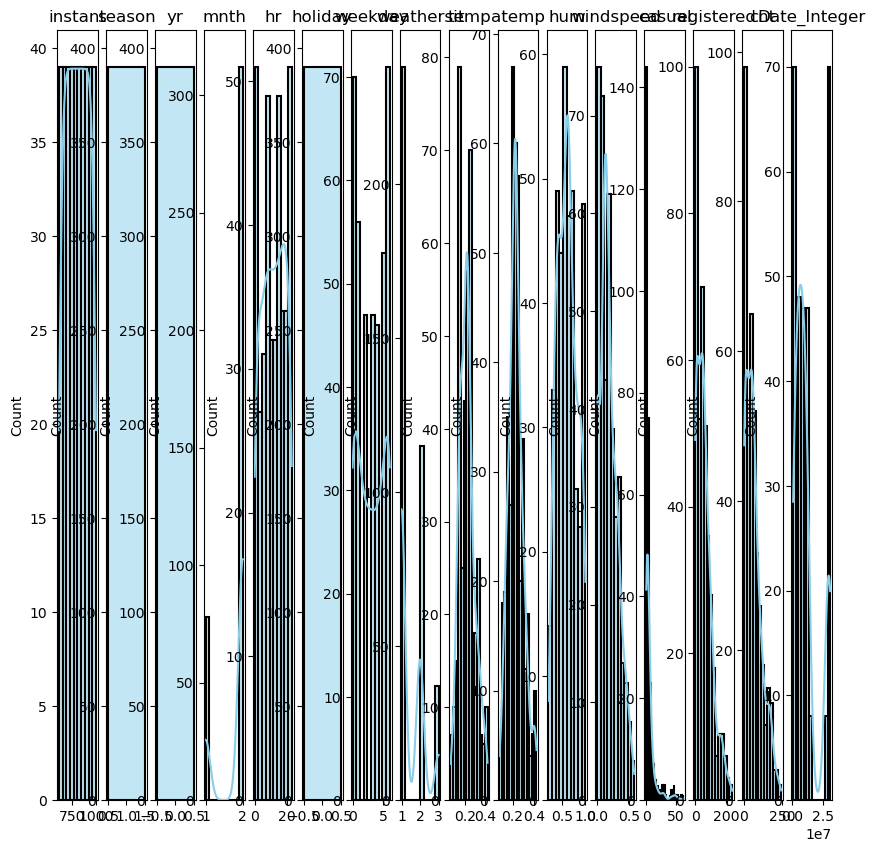

In [50]:
 # Kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each column in the  dataset
fig, axes = plt.subplots(nrows=1, ncols=len(data_3.columns), figsize = (10,10))

# Iterate over each column and plot histogram with KDE
for i, col in enumerate(data_3.columns):
    sns.histplot(data=data_3[col], kde=True, color='skyblue', edgecolor='black', linewidth=1.5, ax=axes[i])
    axes[i].set_title(col)  # Set title for each subplot
    axes[i].set_xlabel('')  # Remove x-label to avoid overlap
    plt.tight_layout()
    
plt.show()

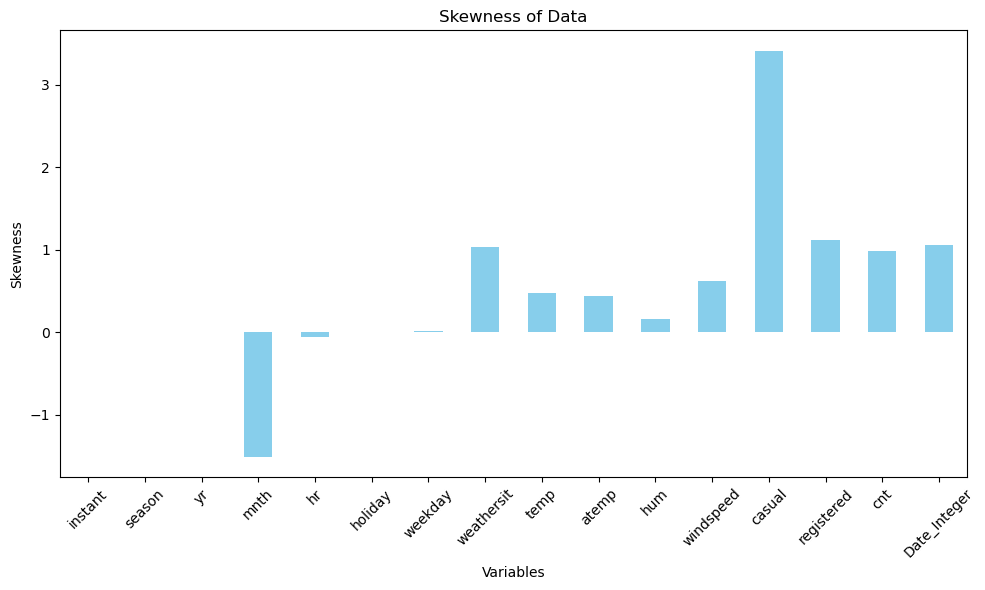

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
#df = pd.read_csv('your_file.csv')

# Calculate skewness for each column
skewness = data_3.skew()

# Plot the skewness
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Data')
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


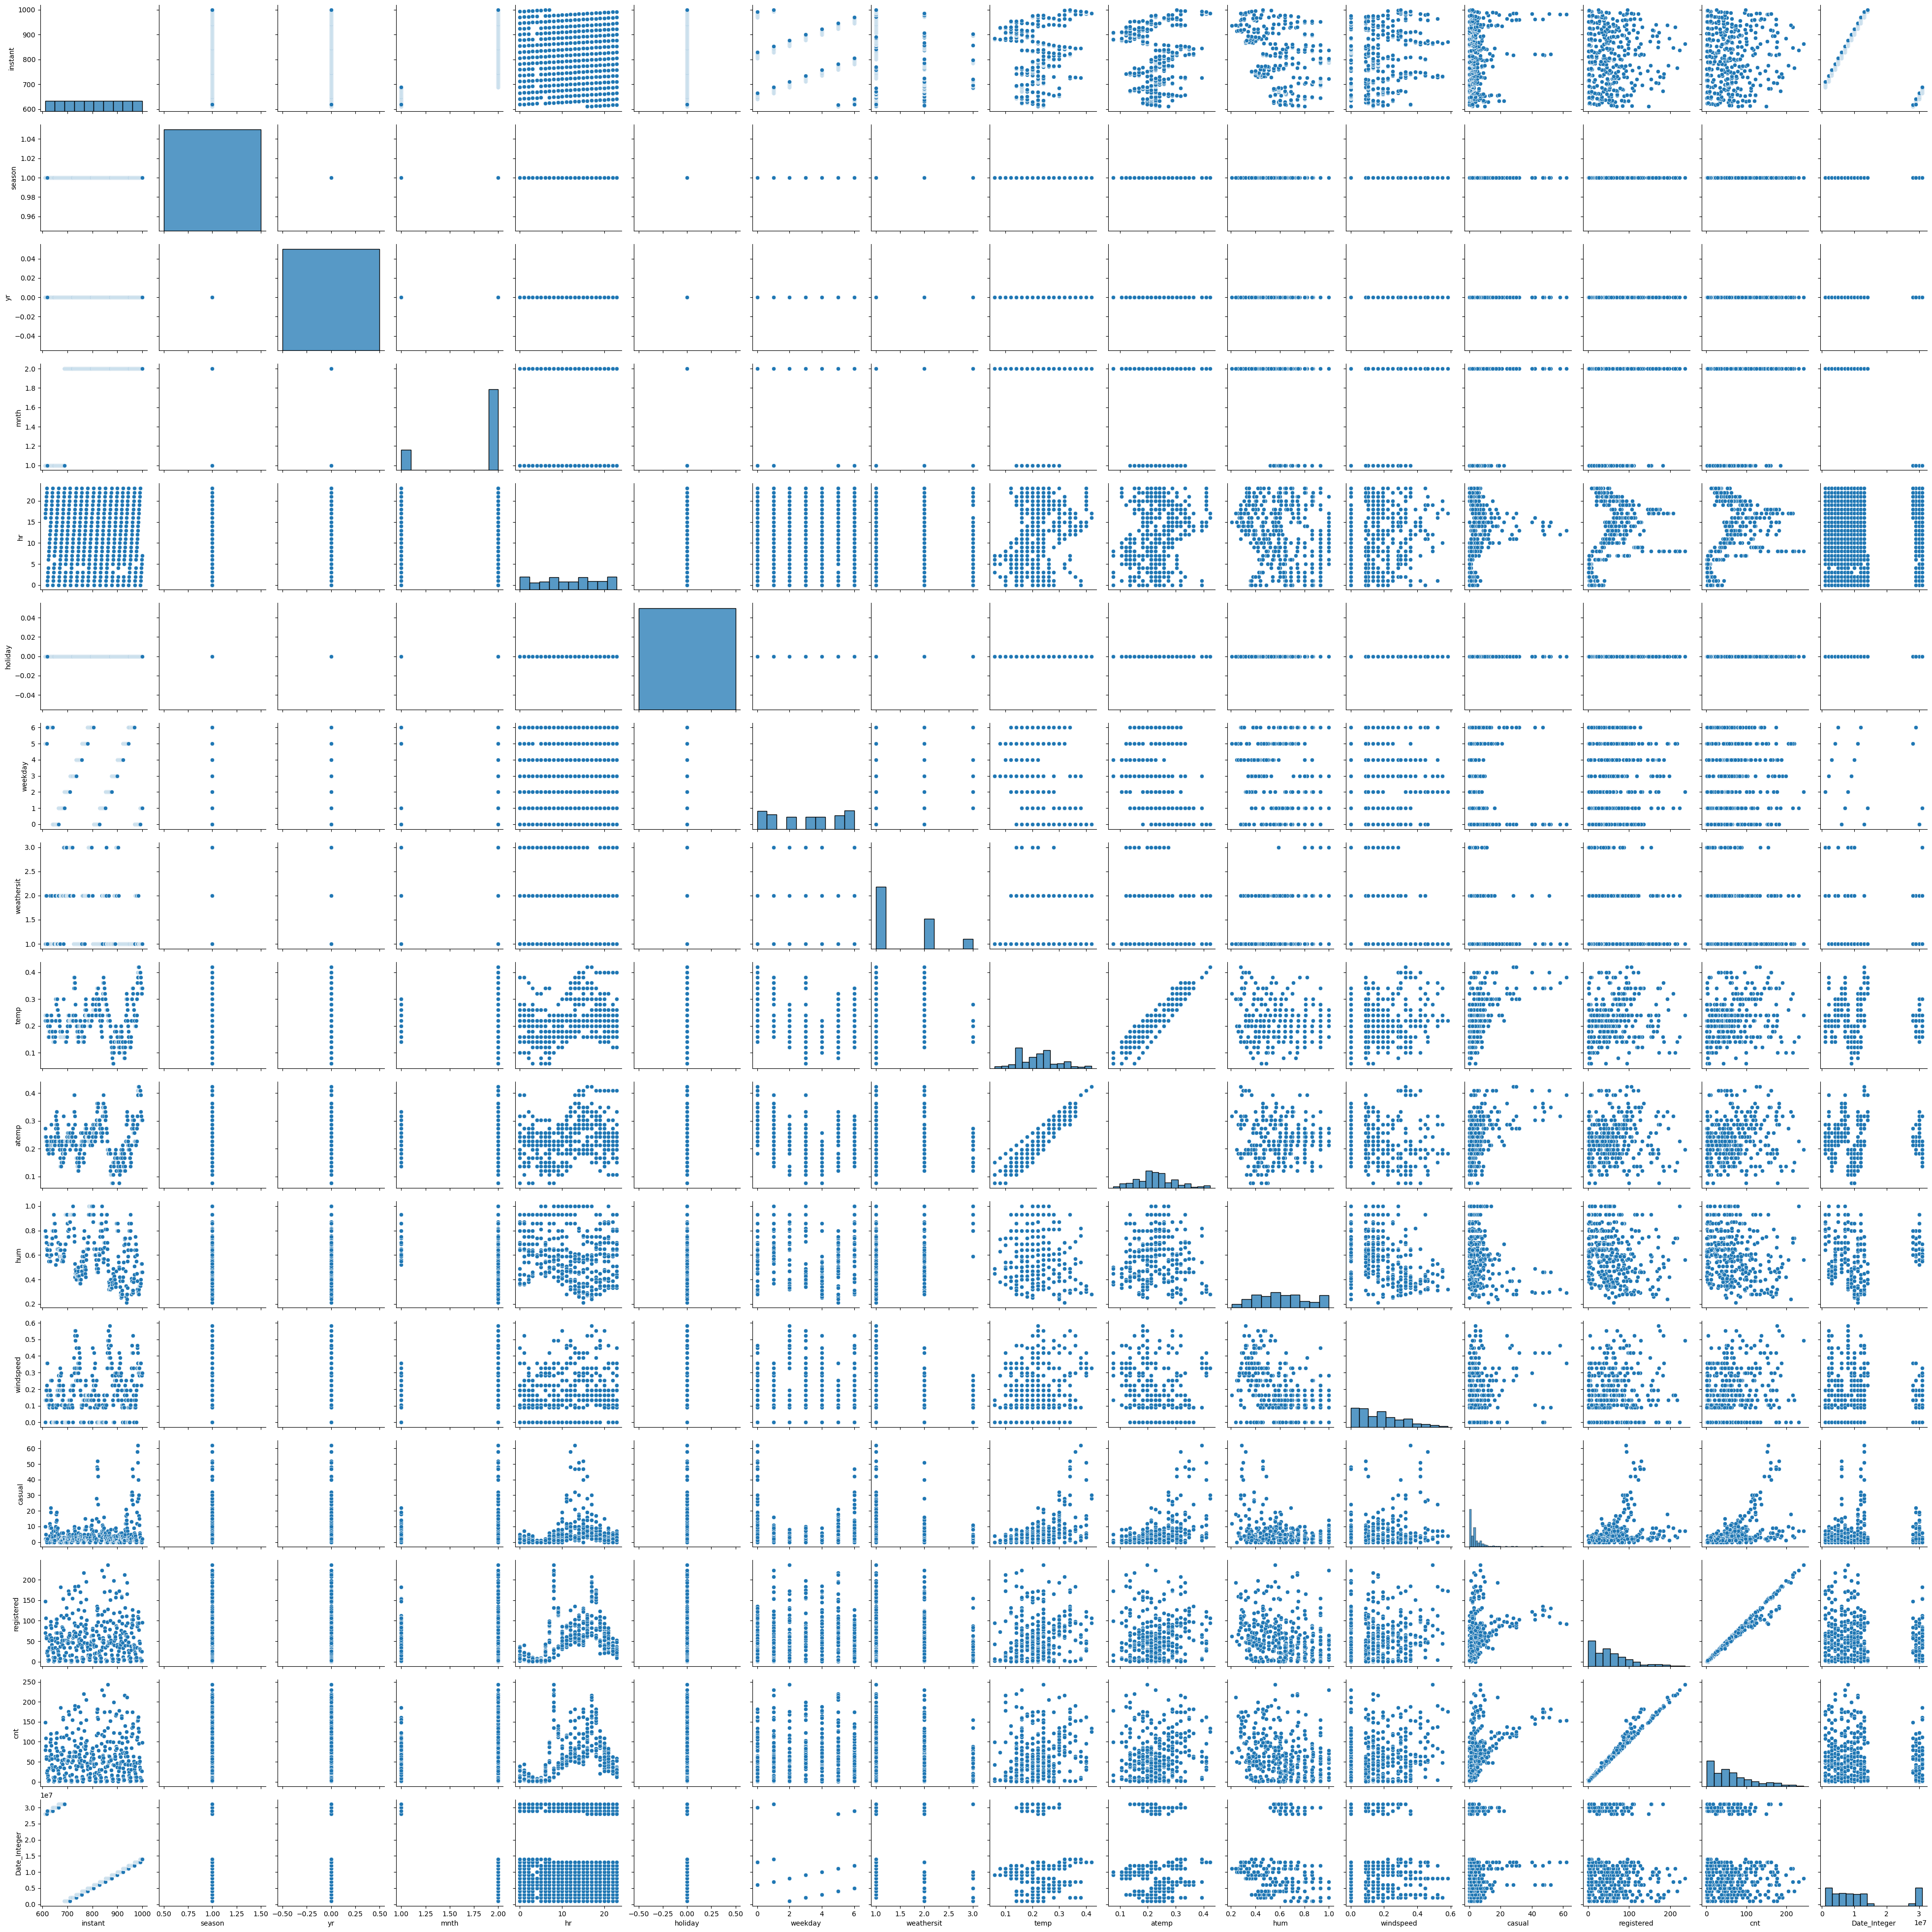

In [22]:
 sns.pairplot(data=data_3)

### Outliers

In [40]:
outliers = ((data_3 < (Q1 - 1.5 * IQR)) | (data_3> (Q3 + 1.5 * IQR))).any()

In [41]:
outliers

instant         False
season          False
yr              False
mnth             True
hr              False
holiday         False
weekday         False
weathersit      False
temp             True
atemp            True
hum             False
windspeed        True
casual           True
registered       True
cnt              True
Date_Integer     True
dtype: bool

In [42]:
outliers = ((data_3 < (Q1 - 1.5 * IQR)) | (data_3> (Q3 + 1.5 * IQR)))
outliers

,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date_Integer
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
386,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
387,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
388,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True


### Visualizing Outliers

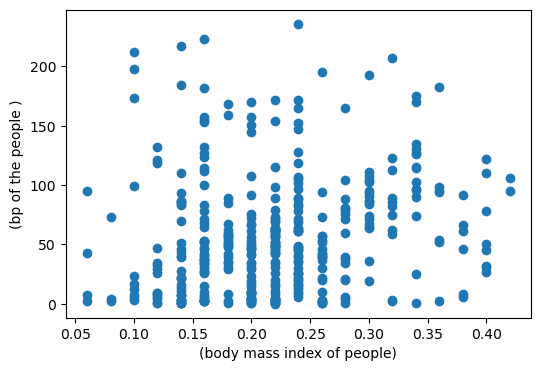

In [7]:
# Visualizing outliers
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(data_3['temp'], data_3['registered'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.show()

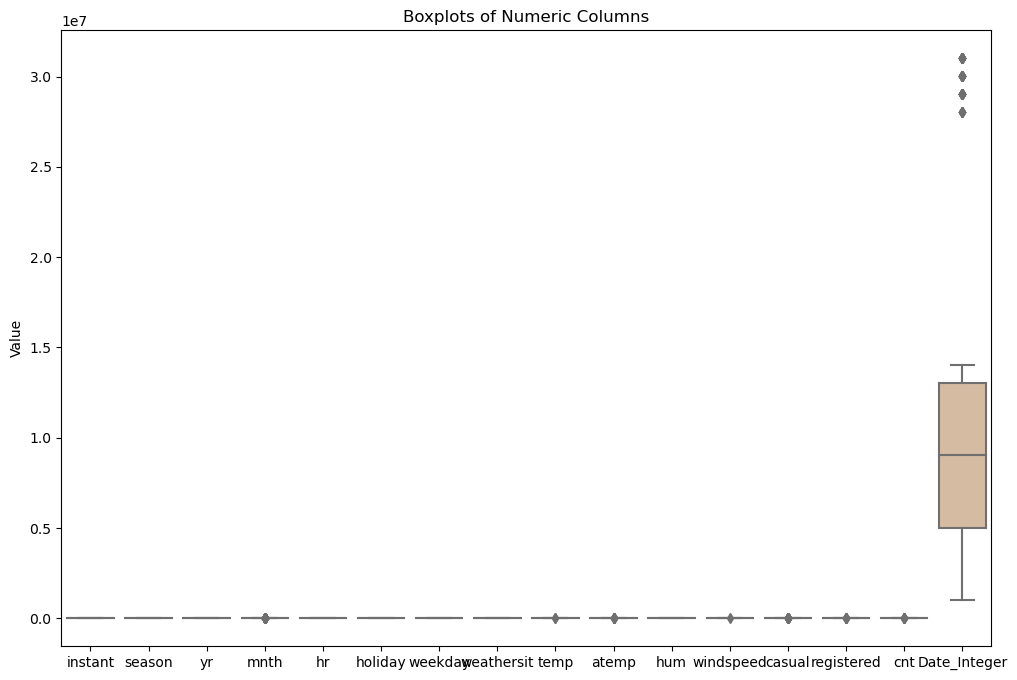

In [8]:
# Visualizing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data = data_3, palette='pastel')
plt.title('Boxplots of Numeric Columns')
plt.ylabel('Value')
plt.show()

#####  Removing outliers

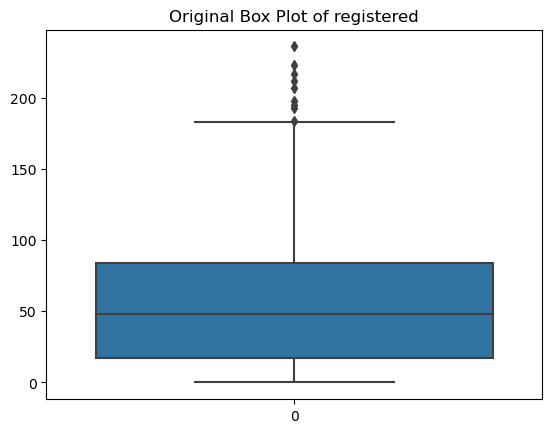

KeyError: 0

In [9]:
# Removing Outliers
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 0.12
 
no_outliers = removal_box_plot(data_3, 'registered', threshold_value)

### Coorelation b/w column

In [51]:
#calculates the relationship between each column in data set. 
corr_matrix = data_3.corr()
corr_matrix


,instant,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Date_Integer
instant,1.000000,NaN,NaN,0.692823,-0.018596,NaN,0.000053,-0.220022,0.164053,0.117704,-0.403658,0.206271,0.219238,0.041795,0.076839,-0.390145
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.692823,NaN,NaN,1.000000,-0.056458,NaN,0.093148,0.027074,0.126446,0.091299,-0.125794,0.142861,0.074397,0.063073,0.071107,-0.933909
hr,-0.018596,NaN,NaN,-0.056458,1.000000,NaN,0.050662,-0.054857,0.278821,0.225257,-0.211255,0.097096,0.203295,0.392769,0.397325,0.032948
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,0.000053,NaN,NaN,0.093148,0.050662,NaN,1.000000,0.052128,-0.289220,-0.319828,0.049960,0.023188,-0.120978,0.013744,-0.008499,-0.120079
weathersit,-0.220022,NaN,NaN,0.027074,-0.054857,NaN,0.052128,1.000000,-0.093247,-0.036555,0.531591,-0.228990,-0.156710,-0.088272,-0.108713,-0.141744
temp,0.164053,NaN,NaN,0.126446,0.278821,NaN,-0.289220,-0.093247,1.000000,0.909959,-0.182066,0.242623,0.530170,0.183277,0.261536,-0.088267
atemp,0.117704,NaN,NaN,0.091299,0.225257,NaN,-0.319828,-0.036555,0.909959,1.000000,-0.019152,-0.130303,0.485061,0.103077,0.179776,-0.064431


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'Date', 'Date_Integer'],
      dtype='object')


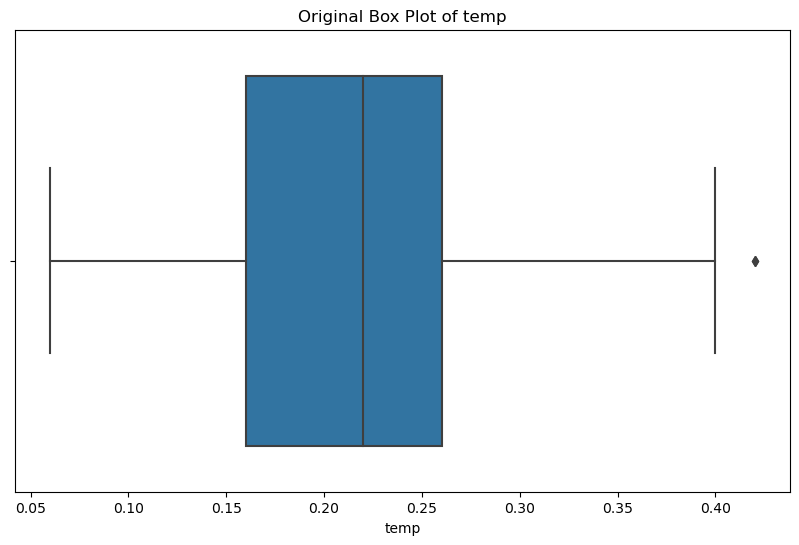

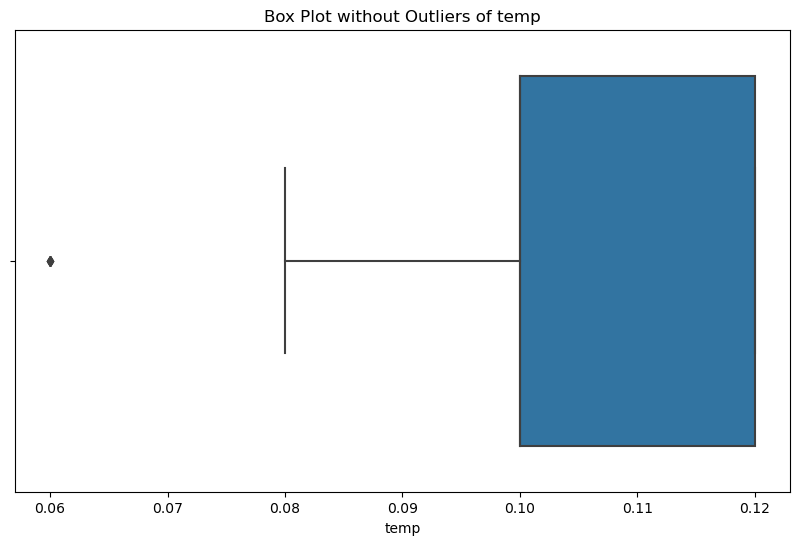

In [14]:


def removal_box_plot(df, column, threshold):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=df)
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=removed_outliers)
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    
    return removed_outliers
 
threshold_value = 0.12

# Print the column names to verify if 'registered' exists
print(data_3.columns)

no_outliers = removal_box_plot(data_3, 'temp', threshold_value)


In [21]:
data_3.head ().T

,0,1,2,3,4
instant,620,621,622,623,624
season,1,1,1,1,1
yr,0,0,0,0,0
mnth,1,1,1,1,1
hr,1,2,3,4,6
holiday,False,False,False,False,False
weekday,6,6,6,6,6
weathersit,1,1,1,1,1
temp,0.22,0.22,0.2,0.16,0.16
atemp,0.2273,0.2273,0.2121,0.1818,0.1818
